<a href="https://colab.research.google.com/github/dharace/Fake-News-Detection/blob/main/TestFakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Proposed Solution for Efficient Fake News Detection using Python**

In this project, we have used various natural language processing techniques and machine learning algorithms to classify fake news articles using sci-kit libraries from python.




**Step 1**

Download gothub repository

In [ ]:
!git clone https://github.com/dharace/Fake-News-Detection.git

Cloning into 'Fake-News-Detection'...
remote: Enumerating objects: 186, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (169/169), done.
remote: Total 186 (delta 102), reused 32 (delta 9), pack-reused 0
Receiving objects: 100% (186/186), 5.75 MiB | 4.69 MiB/s, done.
Resolving deltas: 100% (102/102), done.


In [ ]:
%cd /content/Fake-News-Detection

/content/Fake-News-Detection


In [ ]:
!ls

data  Fake_News_Detection.ipynb  final_model.sav  liar_dataset	README.md  src


In [ ]:
final_model = 'final_model.sav'

In [ ]:
%cd /content/Fake-News-Detection/src

/content/Fake-News-Detection/src


In [ ]:
!ls

Classifier.py  FeatureSelection.py  Requirements.txt
DataPrep.py    Prediction.py


**Step 2**

First, we install the required packages with respect to the versions used in our computations and import the required packages.

In [ ]:
#Installing required packages
!pip install -r Requirements.txt

     |████████████████████████████████| 13.1 MB 4.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


**Step 3:**

Import required classes from github to call methods

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from DataPrep import *
from FeatureSelection import *
from Classifier import *
from Prediction import *
from sklearn.metrics import confusion_matrix, f1_score, classification_report

**Step 4**

**Install Dataset**

LIAR: A BENCHMARK DATASET FOR FAKE NEWS DETECTION

The dataset used for this project were in csv format named train.csv, test.csv and valid.csv and can be found in repo. The original datasets are in "liar" folder in tsv format.

In [ ]:
%cd /content/Fake-News-Detection/src

/content/Fake-News-Detection/src


In [ ]:
#before reading the files, setup the working directory to point to project repo
#reading data files 

test_filename = 'test.csv'
train_filename = 'train.csv'
valid_filename = 'valid.csv'

In [ ]:
nltk.download('treebank')
nltk.download('stopwords')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Step 5:**

Go to the "data" folder & download glove.6B.zip.

In [ ]:
%cd /content/Fake-News-Detection/data

/content/Fake-News-Detection/data


In [ ]:
!ls

test.csv  train.csv  valid.csv


In [ ]:
!wget -O ./glove.6B.zip https://nlp.stanford.edu/data/glove.6B.zip
!unzip ./glove.6B.zip

--2022-04-10 23:45:09--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-04-10 23:45:09--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘./glove.6B.zip’

./glove.6B.zip      100%[===================>] 822.24M  5.29MB/s    in 2m 40s  

2022-04-10 23:47:49 (5.14 MB/s) - ‘./glove.6B.zip’ saved [862182613/862182613]

Archive:  ./glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  infla

In [ ]:
glove_6B_50d = './data/glove.6B.50d.txt'

**Step 6**

Create object of DataPrep.py and pass filepath of each dataset test.csv, train.csv, valid.csv

In [ ]:
dataPrep = DataPrep(test_filename, train_filename, valid_filename)

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Print top five of dataset for reference.

In [ ]:
dataPrep.train_news.head(5)

,Statement,Label
0,Building a wall on the U.S.-Mexico border will...,True
1,Wisconsin is on pace to double the number of l...,False
2,Says John McCain has done nothing to help the ...,False
3,Suzanne Bonamici supports a plan that will cut...,True
4,When asked by a reporter whether hes at the ce...,False


In [ ]:
dataPrep.test_news.head(5)

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True


In [ ]:
dataPrep.valid_news.head(5)

,Statement,Label
0,We have less Americans working now than in the...,FALSE
1,"When Obama was sworn into office, he DID NOT u...",FALSE
2,Says Having organizations parading as being so...,FALSE
3,Says nearly half of Oregons children are poor.,TRUE
4,On attacks by Republicans that various program...,TRUE


By calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes

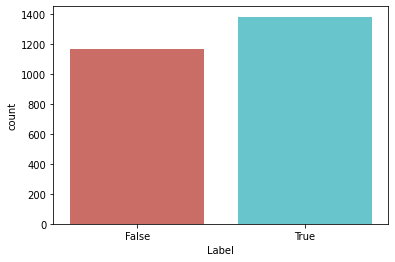

In [ ]:
dataPrep.create_distribution(dataPrep.train_news)

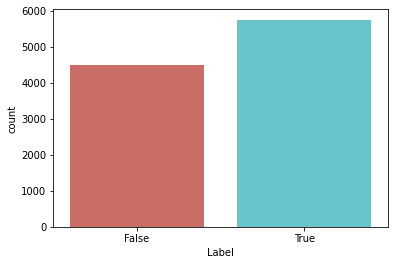

In [ ]:
dataPrep.create_distribution(dataPrep.test_news)

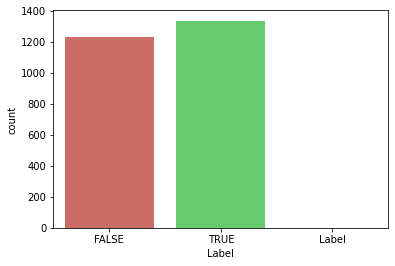

In [ ]:
dataPrep.create_distribution(dataPrep.valid_news)

check the data by calling below function

In [ ]:
dataPrep.data_obs()

training dataset size:
(2551, 2)
                                           Statement  Label
0  Building a wall on the U.S.-Mexico border will...   True
1  Wisconsin is on pace to double the number of l...  False
2  Says John McCain has done nothing to help the ...  False
3  Suzanne Bonamici supports a plan that will cut...   True
4  When asked by a reporter whether hes at the ce...  False
5  Over the past five years the federal governmen...   True
6  Says that Tennessee law requires that schools ...   True
7  Says Vice President Joe Biden "admits that the...  False
8  Donald Trump is against marriage equality. He ...   True
9  We know that more than half of Hillary Clinton...  False
(10240, 2)
                                           Statement  Label
0  Says the Annies List political group supports ...  False
1  When did the decline of coal start? It started...   True
2  Hillary Clinton agrees with John McCain "by vo...   True
3  Health care reform legislation is likely to ma...  Fa

Check the quality of data

In [ ]:
dataPrep.data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  2551 non-null   object
 1   Label      2551 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 22.5+ KB
check finished.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 90.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  2571 non-null   object
 1   Label      2569 non-null   object
dtypes: object(2)
memory usage: 40.3+ KB


Steaming and process data 

In [ ]:
dataPrep.process_data(dataPrep.train_news)

['statement', 'label']

**Step 7**

Create object of FeatureSelection.py and pass filepath of glove_6B_50d.

In [ ]:
featureSelection = TfidfEmbeddingVectorizer(dataPrep.train_news, glove_6B_50d)

CountVectorizer()
  (0, 1000)	1
  (0, 6132)	1
  (0, 4046)	1
  (0, 5729)	1
  (0, 3703)	1
  (0, 922)	1
  (0, 6231)	1
  (0, 5627)	1
  (0, 3463)	1
  (0, 6298)	1
  (1, 4046)	1
  (1, 5729)	1
  (1, 6244)	1
  (1, 3121)	1
  (1, 4158)	1
  (1, 5786)	1
  (1, 1919)	1
  (1, 3980)	1
  (1, 4011)	1
  (1, 3368)	1
  (1, 5754)	1
  (1, 6296)	1
  (2, 5729)	1
  (2, 5786)	1
  (2, 5082)	1
  :	:
  (2549, 3060)	2
  (2549, 3657)	1
  (2549, 5248)	1
  (2549, 844)	1
  (2549, 4501)	1
  (2549, 1237)	1
  (2549, 233)	1
  (2549, 3415)	1
  (2549, 3246)	1
  (2550, 5729)	2
  (2550, 3121)	1
  (2550, 2604)	1
  (2550, 2966)	1
  (2550, 4048)	1
  (2550, 1270)	1
  (2550, 1241)	1
  (2550, 1243)	1
  (2550, 3914)	1
  (2550, 3176)	1
  (2550, 3934)	1
  (2550, 4844)	1
  (2550, 1409)	1
  (2550, 5093)	1
  (2550, 969)	1
  (2550, 6078)	1
0       Building a wall on the U.S.-Mexico border will...
1       Wisconsin is on pace to double the number of l...
2       Says John McCain has done nothing to help the ...
3       Suzanne Bonamici suppor

**Step 8**

Create object of Classifier.py and pass CountVectorizer object, test & train dataset, tfidf_ngram and final model

In [ ]:
classifier = Classifier(featureSelection.countV,dataPrep.test_news, dataPrep.train_news, featureSelection.tfidf_ngram, final_model)

The feature selection has been done in FeatureSelection.py module. here we will create models using those features for prediction

First we will use bag of words techniques to build **Naive-bayes, Logistic Regression, Linear SVM, Stochastic gradient descent and Random forest classifiers**

In [ ]:
classifier.buildClassifier()

*K-fold cross validation for all classifiers*

Confusion matrix, without normalization
Total statements classified: 2551
Score: 0.6690329793168848
score length 5
Confusion matrix:
[[ 548  621]
 [ 374 1008]]


(None, None, None, None, None)

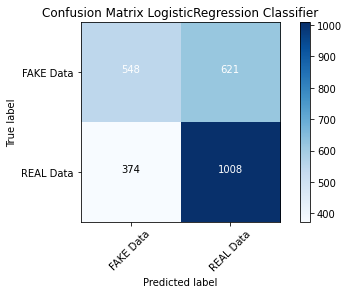

In [ ]:
classifier.build_confusion_matrix(classifier.nb_pipeline, "LogisticRegression Classifier")

Confusion matrix, without normalization
Total statements classified: 2551
Score: 0.63599737021554
score length 5
Confusion matrix:
[[650 519]
 [495 887]]


(None, None, None, None, None)

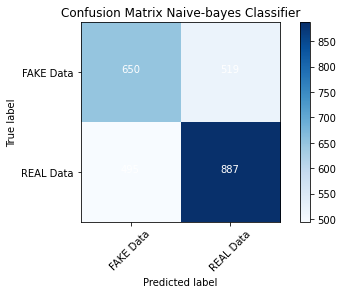

In [ ]:
classifier.build_confusion_matrix(classifier.logR_pipeline, "Naive-bayes Classifier")

Confusion matrix, without normalization
Total statements classified: 2551
Score: 0.6031959656767338
score length 5
Confusion matrix:
[[630 539]
 [551 831]]


(None, None, None, None, None)

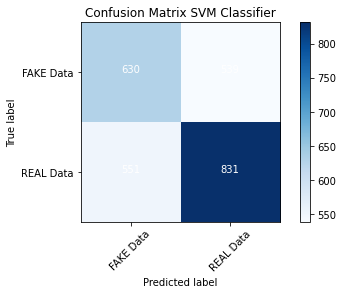

In [ ]:
classifier.build_confusion_matrix(classifier.svm_pipeline, "SVM Classifier")

Confusion matrix, without normalization
Total statements classified: 2551
Score: 0.6058355649820134
score length 5
Confusion matrix:
[[677 492]
 [566 816]]


(None, None, None, None, None)

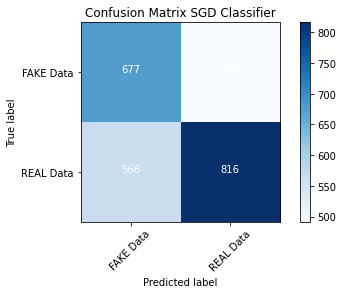

In [ ]:
classifier.build_confusion_matrix(classifier.sgd_pipeline, "SGD Classifier")

Confusion matrix, without normalization
Total statements classified: 2551
Score: 0.6649817771194004
score length 5
Confusion matrix:
[[552 617]
 [386 996]]


(None, None, None, None, None)

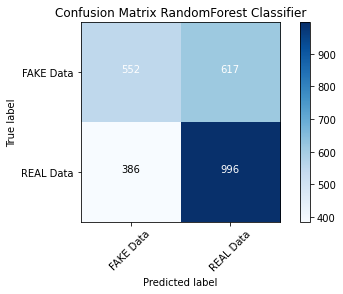

In [ ]:
classifier.build_confusion_matrix(classifier.random_forest, "RandomForest Classifier")

*Build classifier using n-grams*

In [ ]:
classifier.buildClassifierUsingNgrams()

K-fold cross validation for all classifiers

Confusion matrix, without normalization
Total statements classified: 2551
Score: 0.7004442961156355
score length 5
Confusion matrix:
[[ 331  838]
 [ 185 1197]]


(None, None, None, None, None)

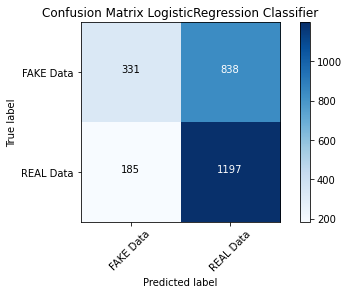

In [ ]:
classifier.build_confusion_matrix(classifier.nb_pipeline_ngram, "LogisticRegression Classifier")

Confusion matrix, without normalization
Total statements classified: 2551
Score: 0.6938867351269742
score length 5
Confusion matrix:
[[ 409  760]
 [ 243 1139]]


(None, None, None, None, None)

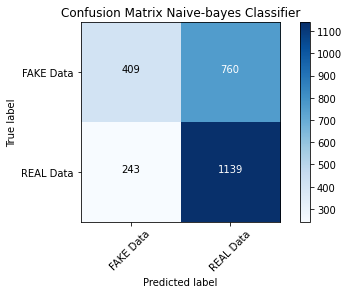

In [ ]:
classifier.build_confusion_matrix(classifier.logR_pipeline_ngram, "Naive-bayes Classifier")

Confusion matrix, without normalization
Total statements classified: 2551
Score: 0.6632826577822492
score length 5
Confusion matrix:
[[584 585]
 [404 978]]


(None, None, None, None, None)

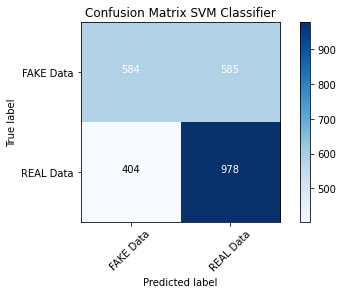

In [ ]:
classifier.build_confusion_matrix(classifier.svm_pipeline_ngram, "SVM Classifier")

Confusion matrix, without normalization
Total statements classified: 2551
Score: 0.6981532423953531
score length 5
Confusion matrix:
[[ 131 1038]
 [  83 1299]]


(None, None, None, None, None)

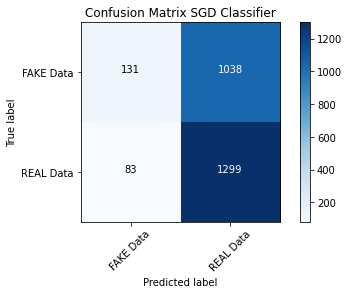

In [ ]:
classifier.build_confusion_matrix(classifier.sgd_pipeline_ngram, "SGD Classifier")

Confusion matrix, without normalization
Total statements classified: 2551
Score: 0.648063635953776
score length 5
Confusion matrix:
[[472 697]
 [384 998]]


(None, None, None, None, None)

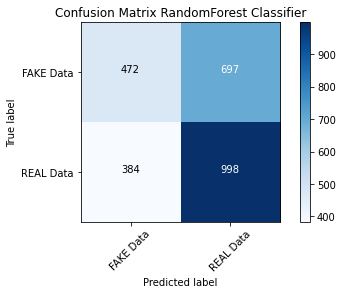

In [ ]:
classifier.build_confusion_matrix(classifier.random_forest_ngram, "RandomForest Classifier")

So far we have used bag of words technique to extract the features and passed those featuers into classifiers. We have also seen the f1 scores of these classifiers. now lets enhance these features using term frequency weights with various n-grams

In [ ]:
print(classification_report(dataPrep.test_news['Label'], classifier.predicted_nb_ngram))
print(classification_report(dataPrep.test_news['Label'], classifier.predicted_LogR_ngram))
print(classification_report(dataPrep.test_news['Label'], classifier.predicted_svm_ngram))
print(classification_report(dataPrep.test_news['Label'], classifier.predicted_sgd_ngram))
print(classification_report(dataPrep.test_news['Label'], classifier.predicted_rf_ngram))

              precision    recall  f1-score   support

       False       0.59      0.25      0.35      4488
        True       0.60      0.86      0.70      5752

    accuracy                           0.59     10240
   macro avg       0.59      0.56      0.53     10240
weighted avg       0.59      0.59      0.55     10240

              precision    recall  f1-score   support

       False       0.59      0.34      0.43      4488
        True       0.61      0.81      0.70      5752

    accuracy                           0.61     10240
   macro avg       0.60      0.58      0.56     10240
weighted avg       0.60      0.61      0.58     10240

              precision    recall  f1-score   support

       False       0.55      0.45      0.49      4488
        True       0.62      0.71      0.66      5752

    accuracy                           0.60     10240
   macro avg       0.58      0.58      0.58     10240
weighted avg       0.59      0.60      0.59     10240

              preci

In [ ]:
classifier.calculateClassifierParam()

In [ ]:
classifier.findBestPerformingModel()

              precision    recall  f1-score   support

       False       0.64      0.04      0.08      4488
        True       0.57      0.98      0.72      5752

    accuracy                           0.57     10240
   macro avg       0.61      0.51      0.40     10240
weighted avg       0.60      0.57      0.44     10240

              precision    recall  f1-score   support

       False       0.59      0.31      0.41      4488
        True       0.61      0.83      0.70      5752

    accuracy                           0.60     10240
   macro avg       0.60      0.57      0.56     10240
weighted avg       0.60      0.60      0.57     10240



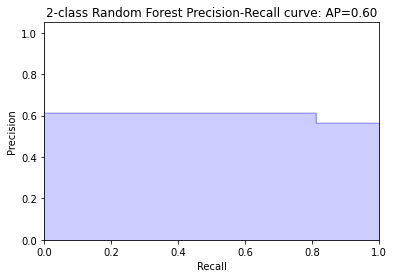

In [ ]:
classifier.plot_PR_curve(classifier.predicted_LogR_ngram)

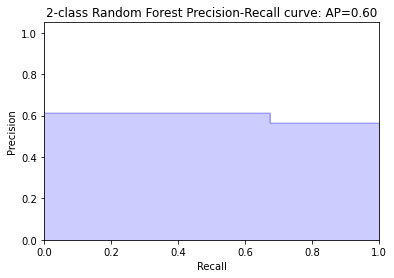

In [ ]:
classifier.plot_PR_curve(classifier.predicted_rf_ngram)

In [ ]:
classifier.show_most_informative_features(classifier.logR_pipeline_ngram,vect='LogR_tfidf',clf='LogR_clf')
classifier.show_most_informative_features(classifier.nb_pipeline_ngram,vect='nb_tfidf',clf='nb_clf')
classifier.show_most_informative_features(classifier.svm_pipeline_ngram,vect='svm_tfidf',clf='svm_clf')
classifier.show_most_informative_features(classifier.sgd_pipeline_ngram,vect='sgd_tfidf',clf='sgd_clf')

['1.1399            000    -0.9599lake north 45th', '1.1214madeleine albrights position    -0.8026millercoors area lacks good', '0.8819         barton    -0.8025kidnapping plus', '0.8411nelson economic record    -0.7648board specific matter hand', '0.8148probably plenty choices    -0.7472   paul krugman', '0.8144chris coons thought    -0.7003      prototype', '0.7477registered voters    -0.6401     says years', '0.7201republican nominee    -0.6188far dont think goes', '0.7177300 000 run seat    -0.5854       says jeb', '0.7043jerseyans tax increases    -0.5645floridas investments alex sink', '0.6894required provide key information    -0.5283eliminate medicare know', '0.6447president obama literally    -0.5182iran insane nuke', '0.6155industry father stake    -0.5156million abortions roe wade', '0.6116 created exists    -0.5078peoples protected health', '0.5978      extension    -0.5021bombing suspect tamerlan tsarnaev', '0.5896executive chris abele    -0.5021      fast food', '0.5653ed

In [ ]:
!cd /content/Fake-News-Detection

In [ ]:
!ls

final_model.sav    glove.6B.200d.txt  glove.6B.50d.txt	test.csv   valid.csv
glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip	train.csv


**Step 9:**

Test the result.
Use below news for quick testing.

1. obama is running for president in 2016
2. Says nearly half of Oregons children are poor.
3. Says Having organizations parading as being social welfare organizations and then being involved in the political combat harkens back to why the statute a hundred years ago said that they were prohibited.

In [ ]:
prediction = Prediction(final_model)

In [ ]:
prediction.detecting_fake_news()

Please enter the news text you want to verify: obama is running for president in 2016
You entered: obama is running for president in 2016
Prediction of the News :  Looking Fake News
The truth probability score is  0.44726729386544384
